# 로지스틱 회귀 - 분류

In [1]:
import numpy as np
import matplotlib.pyplot as plt

- Sigmoid 함수

In [13]:
def sigmoid(x, a=1, b=0):
    return (1. / (1 + np.exp(-a * (x - b))))

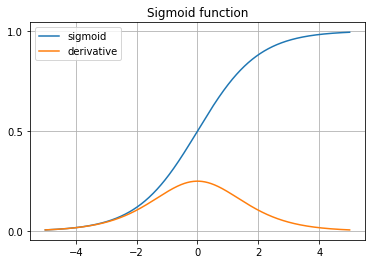

In [14]:
xs = np.linspace(-5, 5, 1001)
ys = sigmoid(xs)
plt.plot(xs, ys, label='sigmoid')
plt.plot(xs, ys*(1-ys), label = 'derivative')
plt.title('Sigmoid function')
plt.yticks([0, 0.5, 1])
plt.grid()
plt.legend()
plt.show()

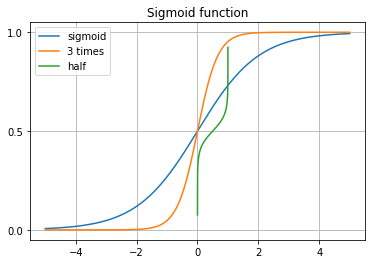

In [20]:
y3 = sigmoid(xs, a=3)
y_half = sigmoid(xs, a=0.5)
xs = np.linspace(-5, 5, 1001)
ys = sigmoid(xs)
plt.plot(xs, ys, label='sigmoid')
plt.plot(xs, y3, label='3 times')
plt.plot(y3, y_half, label='half')
plt.title('Sigmoid function')
plt.yticks([0, 0.5, 1])
plt.grid()
plt.legend()
plt.show()

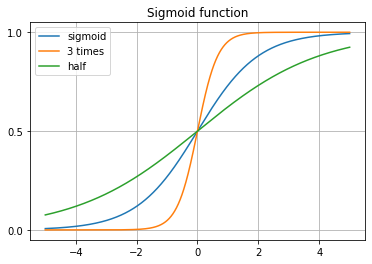

In [19]:
xs = np.linspace(-5, 5, 1001)
ys = sigmoid(xs)
plt.plot(xs, ys, label='sigmoid')
plt.plot(xs, y3, label='3 times')
plt.plot(xs, y_half, label='half')
plt.title('Sigmoid function')
plt.yticks([0, 0.5, 1])
plt.grid()
plt.legend()
plt.show()

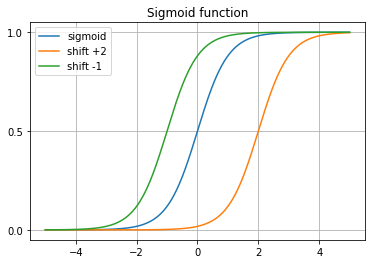

In [18]:
ys = sigmoid(xs, a=2)
y_plus2 = sigmoid(xs, a=2, b=2)
y_minus2 = sigmoid(xs, a=2, b=-1)
plt.plot(xs, ys, label='sigmoid')
plt.plot(xs, y_plus2, label='shift +2')
plt.plot(xs, y_minus2, label='shift -1')
plt.title('Sigmoid function')
plt.yticks([0, 0.5, 1])
plt.grid()
plt.legend()
plt.show()

- 이진분류 

In [21]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

In [23]:
from sklearn.preprocessing import StandardScaler
cancer_std = StandardScaler().fit_transform(cancer.data)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, test_size=0.2,
    random_state=2022
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [26]:
# Logistic 회귀
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state=2022)
lrc.fit(X_train, y_train)
lrc.score(X_test, y_test)

0.9912280701754386

In [28]:
lrc.coef_

array([[-0.25707259, -0.47053468, -0.26515518, -0.3535659 , -0.11973861,
         0.56573207, -0.85426573, -0.82789531,  0.13441632,  0.07846871,
        -1.26329143,  0.29832367, -0.76599244, -0.99137113, -0.30182972,
         1.05456564,  0.08762138, -0.39327008,  0.51932729,  0.5181576 ,
        -0.99890038, -1.13382048, -0.85983726, -0.97362808, -0.6192331 ,
         0.25215457, -0.82557496, -1.11106798, -0.96614897, -0.44679764]])

In [29]:
lrc.intercept_

array([0.07150263])

In [30]:
X_test[0]

array([ 1.61396982,  0.66562299,  1.56650313,  1.72099748,  0.1387526 ,
       -0.03109908,  0.74200738,  1.18809286, -0.83832462, -1.25424076,
        1.27415199, -0.36260285,  1.48456748,  1.58550746, -0.1823337 ,
       -0.36597246,  0.06685396,  0.55376156, -0.84540629, -0.68005955,
        2.28842973,  0.8472399 ,  2.36912947,  2.66748641,  0.82549147,
        0.38635918,  1.27139899,  1.89104864, -0.21476962, -0.43201158])

In [35]:
# dot은 행렬 곱의 값을 반환해줌
# 서로가 1차원인 경우에는 알아서 치완해줌(1,30)도 만찬가지. 1 알아서 바꿔줌.
val = np.dot(lrc.coef_,X_test[0]) + lrc.intercept_
val

array([-20.3489795])

In [36]:
# 이진 분류에서는 sigmoid
sigmoid(val)

array([1.4539534e-09])

In [38]:
# 첫행의 두번째 값과 같음!
lrc.predict_proba(X_test[:5])

array([[9.99999999e-01, 1.45395340e-09],
       [1.29048390e-02, 9.87095161e-01],
       [9.99988662e-01, 1.13377133e-05],
       [5.23798806e-03, 9.94762012e-01],
       [9.99999953e-01, 4.74465654e-08]])

- 다중분류

In [40]:
from sklearn.datasets import load_wine
wine = load_wine()
wine_std = StandardScaler().fit_transform(wine.data)
X_train, X_test, y_train, y_test = train_test_split(
    wine_std, wine.target, stratify=wine.target, test_size=0.2,
    random_state=2022
)


In [41]:
lrc2 = LogisticRegression(random_state=2022)
lrc2.fit(X_train, y_train)
lrc2.score(X_test, y_test)

1.0

In [42]:
lrc2.predict_proba(X_test[:5])

array([[4.79532022e-03, 3.83358577e-02, 9.56868822e-01],
       [9.99880390e-01, 8.55323123e-05, 3.40776815e-05],
       [9.99381277e-01, 3.51523074e-04, 2.67199670e-04],
       [9.90776514e-01, 8.80287077e-03, 4.20615400e-04],
       [6.64072526e-04, 9.97939259e-01, 1.39666854e-03]])

In [43]:
lrc2.predict(X_test[:5])

array([2, 0, 0, 0, 1])

In [51]:
# 13개에 해당되는 개수
# 첫번째는 1번째 값 등으로 대응
# 그래서 값이 3개로 나옴.
lrc2.coef_

array([[ 7.55425328e-01,  2.54696045e-01,  4.48868634e-01,
        -8.27794253e-01,  4.43111539e-02,  2.17556029e-01,
         6.47072052e-01, -1.73818031e-01,  1.37444479e-01,
         1.56334022e-01,  1.23537988e-01,  6.75862331e-01,
         1.03739137e+00],
       [-9.31115735e-01, -4.90126341e-01, -8.24554580e-01,
         5.85648798e-01, -9.34024069e-02, -9.82919053e-03,
         3.38293620e-01,  1.74347892e-01,  2.49046242e-01,
        -9.81806450e-01,  6.67121854e-01,  5.15389011e-02,
        -1.11517327e+00],
       [ 1.75690407e-01,  2.35430296e-01,  3.75685946e-01,
         2.42145455e-01,  4.90912530e-02, -2.07726839e-01,
        -9.85365672e-01, -5.29861108e-04, -3.86490722e-01,
         8.25472428e-01, -7.90659841e-01, -7.27401232e-01,
         7.77818948e-02]])

In [45]:
lrc2.intercept_


array([ 0.39626385,  0.66992355, -1.0661874 ])

In [53]:
val2 = np.dot(lrc2.coef_, X_test[0]) +lrc2.intercept_
val2

array([-2.45825701, -0.3795118 ,  2.83776881])

In [54]:
sigmoid(val2)

array([0.07883682, 0.40624465, 0.94468298])

In [ ]:
[4.79532022e-03, 3.83358577e-02, 9.56868822e-01]

In [59]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))


In [60]:
softmax(np.array([0, 0 , 0]))

array([0.33333333, 0.33333333, 0.33333333])

In [61]:
# 다중 분류에서는 소프트맥스 함수 사용
softmax(val2)

array([0.00479532, 0.03833586, 0.95686882])

In [62]:
np.sum(softmax(val2))

0.9999999999999999